### Sentiments from Space: Insights from Space Experience Reviews with NLP

## Import Libraries

In [61]:
import pandas as pd
import numpy as np
import scipy
import re
import string
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

## Scrapping Data from Nasa Sites and storing the data in CSV

In [62]:

# List of URLs to scrape
urls = [
    'https://blogs.nasa.gov/boeing-crew-flight-test/2024/05/',
    'https://blogs.nasa.gov/boeing-crew-flight-test/2024/05/page/3/',
    'https://blogs.nasa.gov/boeing-crew-flight-test/2024/04/'
]

# Initialize an empty list to hold the reviews
reviews = []

# Iterate over each URL
for url2 in urls:
    # Send a GET request to the URL
    response2 = requests.get(url2)
    
    # Check if the request was successful
    if response2.status_code == 200:
        # Parse the page content
        soup = BeautifulSoup(response2.content, 'html.parser')
        
        # Find all divs with class 'entry-content'
        entry_contents = soup.find_all('div', class_='entry-content')
        
        for entry_content in entry_contents:
            # Get the text content
            content_text = entry_content.get_text()
            
            # Use regular expressions to find text in English-style quotation marks “ ”
            quotes = re.findall(r'“(.*?)”', content_text)
            
            # Add each quote to the reviews list
            for quote in quotes:
                reviews.append(quote)
    else:
        print(f"Failed to retrieve the page {url2}. Status code: {response2.status_code}")

# Write the reviews to a CSV file with serial numbers
with open('reviews.csv', 'w', newline='', encoding='utf-8') as csvfile:
    csvwriter = csv.writer(csvfile)
    
    # Write the header
    csvwriter.writerow(['slno', 'review'])
    
    # Write the reviews with serial numbers
    for i, review in enumerate(reviews, start=1):
        csvwriter.writerow([i, review])

print("Reviews have been saved to reviews.csv.")


Reviews have been saved to reviews.csv.


In [70]:
# Function to scrape reviews from a URL
def scrape_reviews(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    entry_content_div = soup.find("div", class_="entry-content")
    reviews = []
    if entry_content_div:
        reviews = entry_content_div.get_text().split('\n')
        reviews = [review.strip() for review in reviews if review.strip()]
    return reviews

# URLs to scrape
urls = [
    "https://www.nasa.gov/humans-in-space/isolation-what-can-we-learn-from-the-experiences-of-nasa-astronauts/",
    "https://blogs.nasa.gov/spacestation/"
]

# Scrape reviews from each URL
all_reviews = []
for url in urls:
    reviews = scrape_reviews(url)
    all_reviews.extend(reviews)

# Write reviews to CSV file
with open('reviews.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['slno', 'review'])  # Write header
    for i, review in enumerate(all_reviews, start=1):
        writer.writerow([i, review])
print("Data saved to data.csv")


Data saved to data.csv


## Feature Engineering

In [71]:
data =pd.read_csv('reviews.csv')

In [72]:
data.head()

,slno,review
0,1,Credit: NASA
1,2,Social isolation takes a toll on our health. S...
2,3,"Tom Williams, lead scientist for the Human Fac..."
3,4,Community: One way astronauts endure isolation...
4,5,"During a global pandemic, staying home is one ..."


In [73]:
data.describe()

,slno
count,29.000000
mean,15.000000
std,8.514693
min,1.000000
25%,8.000000
50%,15.000000
75%,22.000000
max,29.000000


In [74]:
data.count()

slno      29
review    29
dtype: int64

In [75]:
data['review'].isnull().sum()

0

In [76]:
data['review']

0                                          Credit: NASA
1     Social isolation takes a toll on our health. S...
2     Tom Williams, lead scientist for the Human Fac...
3     Community: One way astronauts endure isolation...
4     During a global pandemic, staying home is one ...
5     Openness: “People who are open tend to be more...
6     Being open helps us adapt to life’s changes. I...
7     Networking: Family communication is important....
8     If we, or a loved one, are socially isolated o...
9     Needs: To stay physiologically, emotionally an...
10    On Earth, we can commit to maintaining a healt...
11    Expeditionary Mindset: “Self- and team care, c...
12    We can demonstrate an expeditionary mindset in...
13    Countermeasures: Another part of crew readines...
14    In isolation, we can journal to help regulate ...
15    Training and Preparation: “Astronauts prepare ...
16    The downtime of isolation is a good chance to ...
17    You can learn more about NASA research to 

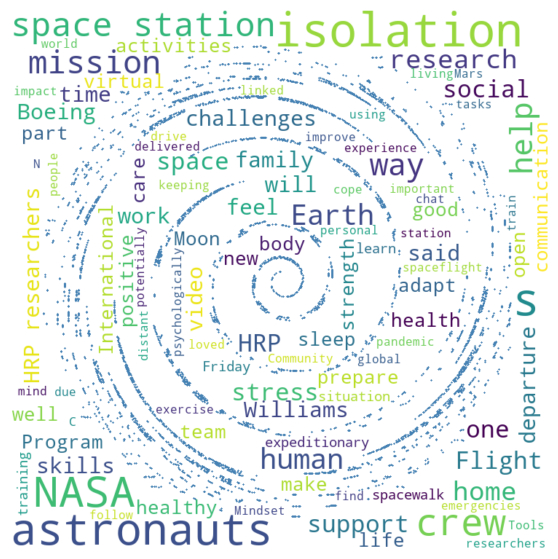

In [16]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Assuming 'data' is a DataFrame and 'review' is the column with text data # replace with your actual file path
text = " ".join(data['review'].astype(str).tolist())  # Convert the series to a single string

# Load the spaceship mask image
mask = np.array(Image.open("blade.jpeg"))

# Generate word cloud using the mask
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=100,
    mask=mask,
    contour_width=3,
    contour_color='steelblue'
).generate(text)

# Display the word cloud with the mask
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation='bilinear')
# plt.title('Spaceship Type Word Cloud with Symbol Mask', fontsize=20)
plt.axis('off')
plt.show()


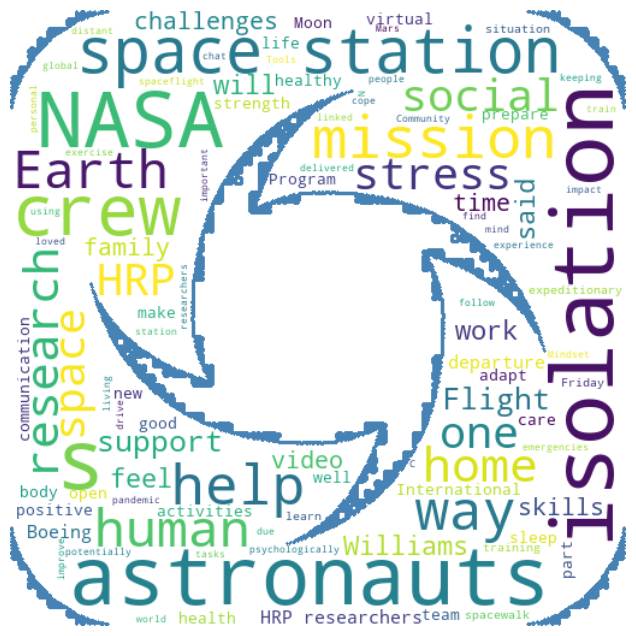

In [17]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Assuming 'data' is a DataFrame and 'review' is the column with text data # replace with your actual file path
text = " ".join(data['review'].astype(str).tolist())  # Convert the series to a single string

# Load the spaceship mask image
mask = np.array(Image.open("ninja.jpeg"))

# Generate word cloud using the mask
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=100,
    mask=mask,
    contour_width=3,
    contour_color='steelblue'
).generate(text)

# Display the word cloud with the mask
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
# plt.title('Spaceship Type Word Cloud with Symbol Mask', fontsize=20)
plt.axis('off')
plt.show()


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   slno    29 non-null     int64 
 1   review  29 non-null     object
dtypes: int64(1), object(1)
memory usage: 592.0+ bytes


In [19]:
data.review.isna().sum()

0

## Adding Extra Features for analysis

In [20]:
data['Review_length'] = data['review'].apply(len)
print(data.shape)
data.head()

(29, 3)


,slno,review,Review_length
0,1,Credit: NASA,12
1,2,Social isolation takes a toll on our health. S...,339
2,3,"Tom Williams, lead scientist for the Human Fac...",337
3,4,Community: One way astronauts endure isolation...,437
4,5,"During a global pandemic, staying home is one ...",312


In [21]:
data['Review_length'].describe()

count     29.000000
mean     298.655172
std      167.641470
min        4.000000
25%      167.000000
50%      312.000000
75%      450.000000
max      547.000000
Name: Review_length, dtype: float64

/var/folders/pg/p5rrd54j5d537p9bjccw3hzr0000gn/T/ipykernel_78102/3082906998.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Review_length'] ,hist=True, bins=100)


<Axes: xlabel='Review_length', ylabel='Density'>

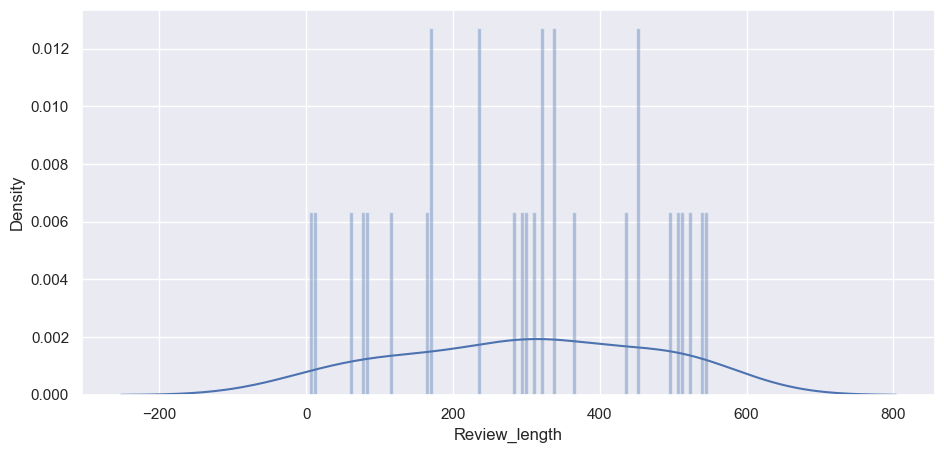

In [22]:
sns.set(rc={'figure.figsize':(11,5)})
sns.distplot(data['Review_length'] ,hist=True, bins=100)

In [23]:
def count_exclamation_mark(string_text):
    count = 0
    for char in string_text:
        if char == '!':
            count += 1
    return count

In [24]:
data['count_exc'] = data['review'].apply(count_exclamation_mark)
data.head(5)

,slno,review,Review_length,count_exc
0,1,Credit: NASA,12,0
1,2,Social isolation takes a toll on our health. S...,339,0
2,3,"Tom Williams, lead scientist for the Human Fac...",337,0
3,4,Community: One way astronauts endure isolation...,437,0
4,5,"During a global pandemic, staying home is one ...",312,0


In [25]:
data['count_exc'].describe(np.arange(0.2, 1.0, 0.2))

count    29.0
mean      0.0
std       0.0
min       0.0
20%       0.0
40%       0.0
50%       0.0
60%       0.0
80%       0.0
max       0.0
Name: count_exc, dtype: float64

In [26]:
data[data['count_exc']== 41].index

Index([], dtype='int64')

In [27]:
data['review'][1]

'Social isolation takes a toll on our health. Sometimes social isolation is necessary due to emergencies like a global pandemic, as is the case with the coronavirus that causes the COVID-19 disease. NASA astronauts also experience social isolation living on the International Space Station as they will during missions to the Moon and Mars.'

In [28]:
data['Polarity'] = data['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
data.head(5)

,slno,review,Review_length,count_exc,Polarity
0,1,Credit: NASA,12,0,0.000000
1,2,Social isolation takes a toll on our health. S...,339,0,-0.003571
2,3,"Tom Williams, lead scientist for the Human Fac...",337,0,0.087500
3,4,Community: One way astronauts endure isolation...,437,0,0.133333
4,5,"During a global pandemic, staying home is one ...",312,0,0.366667


<Axes: ylabel='Frequency'>

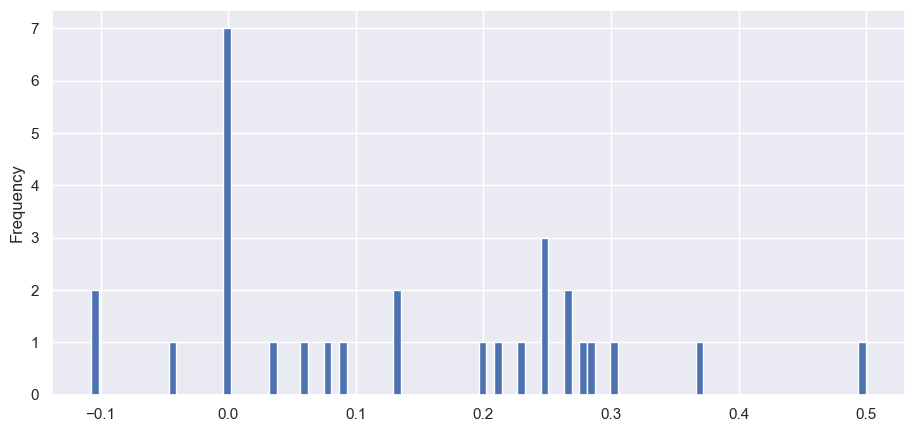

In [29]:
data['Polarity'].plot(kind='hist', bins=100)

In [30]:
text_prep = data.copy()

# Preprocessing - text features

In [31]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

In [33]:
text_prep['review'] = text_prep['review'].apply(punctuation_removal)
text_prep['review'].head()

0                                          Credit NASA
1    Social isolation takes a toll on our health So...
2    Tom Williams lead scientist for the Human Fact...
3    Community One way astronauts endure isolation ...
4    During a global pandemic staying home is one w...
Name: review, dtype: object

## Parts of Speach Filter

In [34]:
def adj_collector(review_string):
    new_string=[]
    review_string = word_tokenize(review_string)
    tup_word = nltk.pos_tag(review_string)
    for tup in tup_word:
        if 'VB' in tup[1] or tup[1]=='JJ':  #Verbs and Adjectives
            new_string.append(tup[0])  
    return ' '.join(new_string)

In [35]:
text_prep['review'] = text_prep['review'].apply(adj_collector)
text_prep['review'].head(7)

0                                                     
1    Social takes social is necessary due global is...
2    lead s developed described represents are impo...
3    astronauts endure is knowing has social “ help...
4    global pandemic is contribute do foster make c...
5    “ are open be resilient see approach ” said ad...
6    Being open helps adapt find new complete such ...
Name: review, dtype: object

## Stopwords

In [36]:
print(stopwords.words('english')[::12])

['i', "you'd", 'hers', 'which', 'were', 'a', 'at', 'above', 'again', 'both', 'own', "don't", 'aren', 'haven', "shan't"]


In [37]:
stop = stopwords.words('english')
stop.append("i'm")

### Stopwords punctuation removal

In [38]:
stop_words = []

for item in stop: 
    new_item = punctuation_removal(item)
    stop_words.append(new_item) 
print(stop_words[::12])

['i', 'youd', 'hers', 'which', 'were', 'a', 'at', 'above', 'again', 'both', 'own', 'dont', 'aren', 'haven', 'shant']


In [39]:
space_list = [
    "Astronomy", "Asteroid", "Black Hole", "Comet", "Constellation", 
    "Galaxy", "Light-Year", "Meteor", "Nebula", "Orbit", 
    "Planet", "Satellite", "Solar System", "Star", "Universe"
]

In [40]:
def stopwords_removal(messy_str):
    messy_str = word_tokenize(messy_str)
    return [word.lower() for word in messy_str 
            if word.lower() not in stop_words and word.lower() not in space_list ]

In [41]:
text_prep['review'] = text_prep['review'].apply(stopwords_removal)
text_prep['review'].head()

0                                                   []
1    [social, takes, social, necessary, due, global...
2    [lead, developed, described, represents, impor...
3    [astronauts, endure, knowing, social, “, helpe...
4    [global, pandemic, contribute, foster, make, c...
Name: review, dtype: object

In [42]:
print(text_prep['review'][1])

['social', 'takes', 'social', 'necessary', 'due', 'global', 'causes', 'astronauts', 'experience', 'social', 'living']


# Sentimental Analysis

In [45]:
porter = PorterStemmer()

In [46]:
# text_prep['review'] = text_prep['review'].apply(lambda x: x.split())
text_prep['review'].head()

0                                                   []
1    [social, takes, social, necessary, due, global...
2    [lead, developed, described, represents, impor...
3    [astronauts, endure, knowing, social, “, helpe...
4    [global, pandemic, contribute, foster, make, c...
Name: review, dtype: object

In [47]:
def stem_update(text_list):
    text_list_new = []
    for word in text_list:
        word = porter.stem(word)
        text_list_new.append(word) 
    return text_list_new

In [48]:
text_prep['review'] = text_prep['review'].apply(stem_update)
text_prep['review'].head()

0                                                   []
1    [social, take, social, necessari, due, global,...
2    [lead, develop, describ, repres, import, under...
3    [astronaut, endur, know, social, “, help, unit...
4    [global, pandem, contribut, foster, make, char...
Name: review, dtype: object

In [49]:
text_prep['review'] = text_prep['review'].apply(lambda x: ' '.join(x))
text_prep['review'].head()

0                                                     
1    social take social necessari due global caus a...
2    lead develop describ repres import understand ...
3    astronaut endur know social “ help unit felt s...
4    global pandem contribut foster make charit fin...
Name: review, dtype: object

In [50]:
text_prep['review']

0                                                      
1     social take social necessari due global caus a...
2     lead develop describ repres import understand ...
3     astronaut endur know social “ help unit felt s...
4     global pandem contribut foster make charit fin...
5     “ open resili see approach ” said ad open posi...
6     open help adapt find new complet telework virt...
7     network import make feel separ love mental ava...
8     love isol interact mani commun video organ cel...
9     stay fit exercis healthi follow make programm ...
10    commit maintain healthi exercis eat keep enjoy...
11    expeditionari cultur essenti expeditionari sai...
12    demonstr expeditionari continu good keep clean...
13    focus develop reduc express cope help eas crew...
14    journal help regul reduc mind practic recogn p...
15        said similar studi astronaut identifi distant
16    good reflect build build new onlin instruct dr...
17                   learn help deal affect cope

In [51]:
text_prep.head()

,slno,review,Review_length,count_exc,Polarity
0,1,,12,0,0.000000
1,2,social take social necessari due global caus a...,339,0,-0.003571
2,3,lead develop describ repres import understand ...,337,0,0.087500
3,4,astronaut endur know social “ help unit felt s...,437,0,0.133333
4,5,global pandem contribut foster make charit fin...,312,0,0.366667


In [52]:
# Define a function to get the sentiment polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [53]:
# Apply the function to the Review column
text_prep['Sentiment_Polarity'] = text_prep['review'].apply(get_polarity)

# Display the DataFrame with the new Sentiment_Polarity column
print(text_prep)

    slno                                             review  Review_length  \
0      1                                                                12   
1      2  social take social necessari due global caus a...            339   
2      3  lead develop describ repres import understand ...            337   
3      4  astronaut endur know social “ help unit felt s...            437   
4      5  global pandem contribut foster make charit fin...            312   
5      6  “ open resili see approach ” said ad open posi...            507   
6      7  open help adapt find new complet telework virt...            170   
7      8  network import make feel separ love mental ava...            547   
8      9  love isol interact mani commun video organ cel...            237   
9     10  stay fit exercis healthi follow make programm ...            366   
10    11  commit maintain healthi exercis eat keep enjoy...            235   
11    12  expeditionari cultur essenti expeditionari sai...     

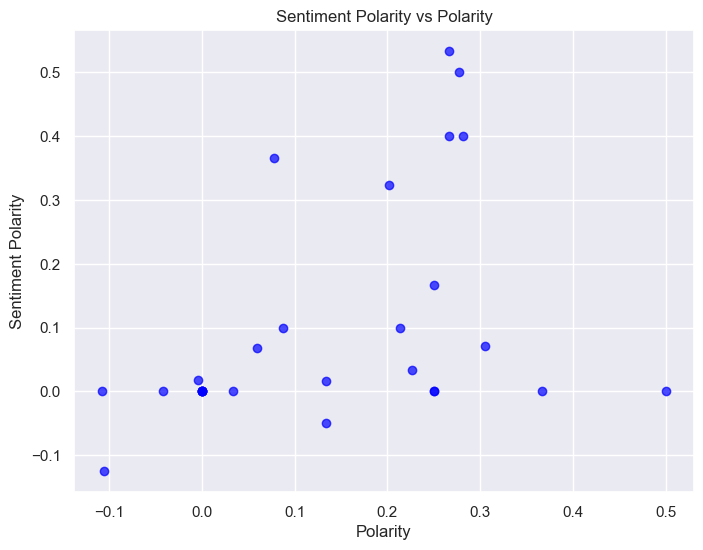

In [54]:
# Extracting data
polarity = text_prep["Polarity"]
sentiment_polarity = text_prep["Sentiment_Polarity"]

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(polarity, sentiment_polarity, color='blue', alpha=0.7)
plt.title('Sentiment Polarity vs Polarity')
plt.xlabel('Polarity')
plt.ylabel('Sentiment Polarity')
plt.grid(True)
plt.show()

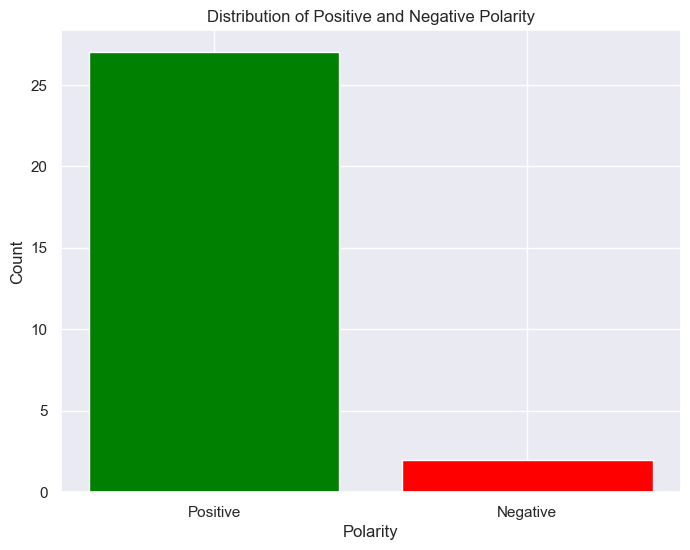

In [55]:
# Extracting positive and negative polarities
positive_polarity = [p for p in text_prep["Sentiment_Polarity"] if p >= 0]
negative_polarity = [p for p in text_prep["Sentiment_Polarity"] if p < 0]

# Counting positive and negative polarities
positive_count = len(positive_polarity)
negative_count = len(negative_polarity)

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['Positive', 'Negative'], [positive_count, negative_count], color=['green', 'red'])
plt.title('Distribution of Positive and Negative Polarity')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()

In [56]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_absolute_error, mean_squared_error

# Assuming you have the actual sentiment labels derived from Sentiment_Polarity
actual_sentiments = np.where(text_prep['Sentiment_Polarity'] > 0, 1, 0)

# Predicted sentiments based on Polarity (positive if Polarity > 0, negative otherwise)
predicted_sentiments = np.where(text_prep['Polarity'] > 0, 1, 0)

# Accuracy
accuracy = accuracy_score(actual_sentiments, predicted_sentiments)
print("Accuracy:", accuracy)

# Precision and Recall
precision = precision_score(actual_sentiments, predicted_sentiments)
recall = recall_score(actual_sentiments, predicted_sentiments)
print("Precision:", precision)
print("Recall:", recall)

# F1 Score
f1 = f1_score(actual_sentiments, predicted_sentiments)
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(actual_sentiments, predicted_sentiments)
print("Confusion Matrix:\n", conf_matrix)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(text_prep['Sentiment_Polarity'], text_prep['Polarity'])
print("MAE:", mae)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(text_prep['Sentiment_Polarity'], text_prep['Polarity'], squared=False)
print("RMSE:", rmse)


Accuracy: 0.7586206896551724
Precision: 0.6842105263157895
Recall: 0.9285714285714286
F1 Score: 0.7878787878787878
Confusion Matrix:
 [[ 9  6]
 [ 1 13]]
MAE: 0.12723157270571062
RMSE: 0.17957588827001272


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
